In [1]:
# importing liraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the csv file and printing its shape
surp = pd.read_csv("C:\\Users\\Hp\\Downloads\\train.csv")
surp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
surp.shape

(1460, 81)

In [4]:
surp.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
percent_missing = round((surp.isnull().sum()/ len(surp)* 100).sort_values(ascending = False),2)
percent_missing.head(20)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Id               0.00
dtype: float64

In [6]:
# Dropping Columns with high missing values ,above 40%

surp.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [7]:
surp.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [8]:
surp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
surp[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [10]:
surp['LotFrontage'] = surp.LotFrontage.fillna(surp.LotFrontage.median()) #Can see a presence of outlier so imputing the missing values through median
surp['MasVnrArea']= surp.MasVnrArea.fillna(surp.MasVnrArea.median())    # Can see presence of outlier
surp['GarageYrBlt']= surp.GarageYrBlt.fillna(surp.GarageYrBlt.mean())  # it looks stable with no outlier presence so we can use mean for imputation

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

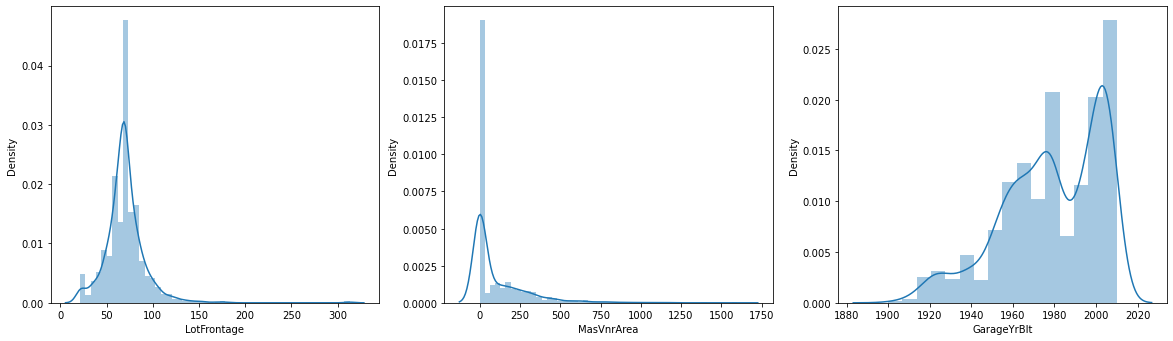

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.distplot(surp['LotFrontage'])
plt.subplot(2,3,2)
sns.distplot(surp['MasVnrArea'])
plt.subplot(2,3,3)
sns.distplot(surp['GarageYrBlt'])

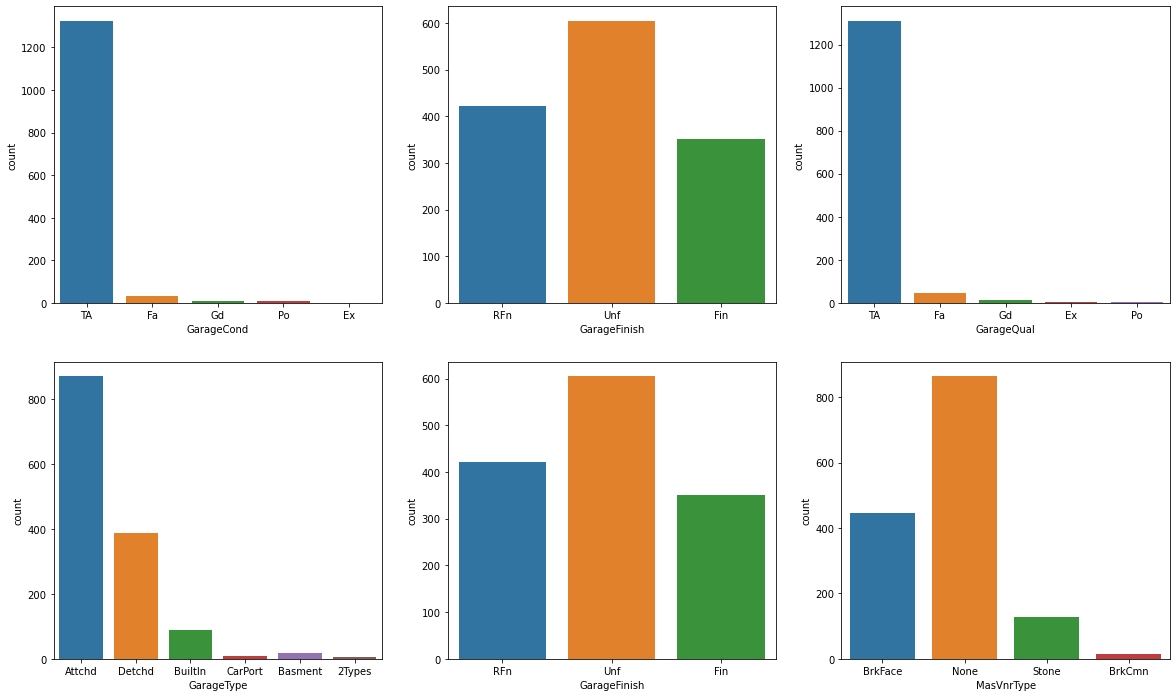

In [12]:
#Visualising the variables wih missing values

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageCond', data = surp)

plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish',  data = surp)

plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = surp)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageType', data = surp)
plt.subplot(2,3,5)
sns.countplot(x = 'GarageFinish',  data = surp)
plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType', data = surp)
plt.show()

In [13]:
surp.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [14]:
 #Cases when the house doesn't have the garrage so replacing null with No Garrage

surp['GarageType'] = surp['GarageType'].replace(np.nan, 'No Garage')
surp['GarageFinish'] = surp['GarageFinish'].replace(np.nan, 'No Garage')
surp['GarageCond'] = surp['GarageCond'].replace(np.nan, 'No Garage')
surp['GarageQual'] = surp['GarageQual'].replace(np.nan, 'No Garage')
surp['MasVnrType'] = surp['MasVnrType'].replace(np.nan, 'None') # replacing nan with the top option of this field
surp['Electrical'] = surp['Electrical'].replace(np.nan, 'SBrkr') # replacing nan with the top option of this field

In [15]:
surp.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [16]:
#changing num to categorical so as to form these as dummy variables 
surp['MSSubClass']=surp['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

surp['OverallQual']=surp['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
surp['OverallCond']=surp['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [17]:
surp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


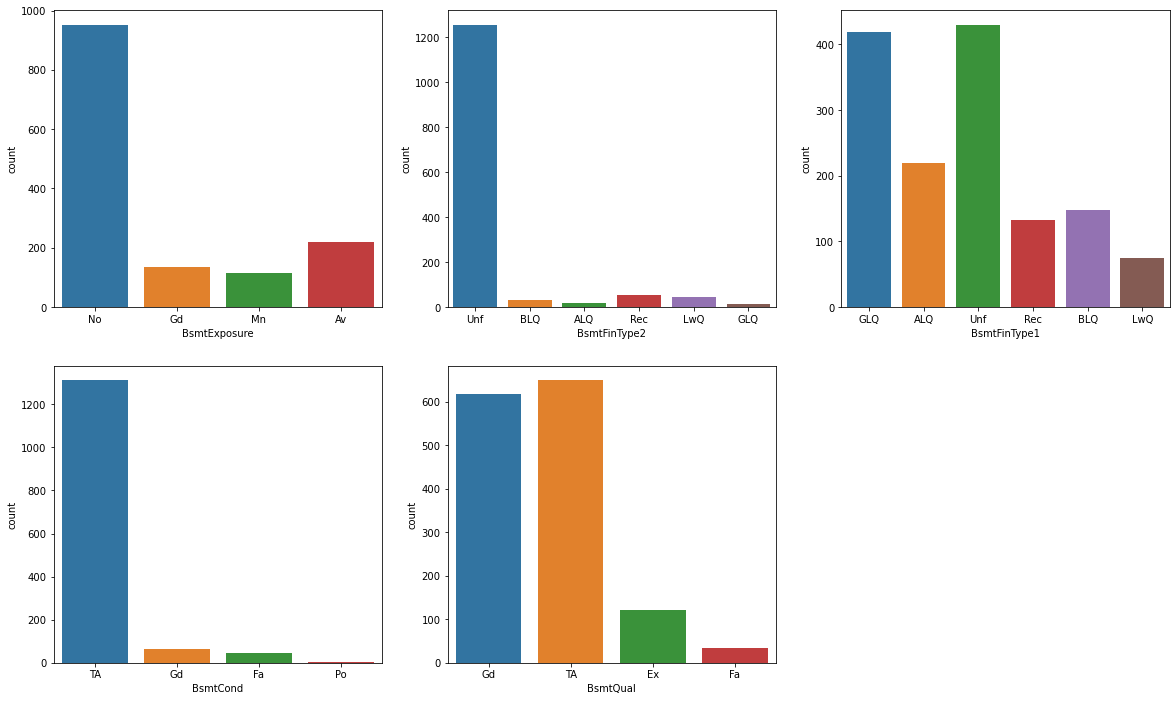

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtExposure', data = surp)

plt.subplot(2,3,2)
sns.countplot(x = 'BsmtFinType2',  data = surp)

plt.subplot(2,3,3)
sns.countplot(x = 'BsmtFinType1', data = surp)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtCond', data = surp)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtQual',  data = surp)

plt.show()

In [19]:
# Cases when the house doesn't have the basement so replacing null with No Basement

surp['BsmtExposure'] = surp['BsmtExposure'].replace(np.nan, 'No Basement')
surp['BsmtFinType2'] = surp['BsmtFinType2'].replace(np.nan, 'No Basement')
surp['BsmtFinType1'] = surp['BsmtFinType1'].replace(np.nan, 'No Basement')
surp['BsmtCond'] = surp['BsmtCond'].replace(np.nan, 'No Basement')
surp['BsmtQual'] = surp['BsmtQual'].replace(np.nan, 'No Basement')

In [20]:
#check missing percentage
percent_missing = (surp.isnull().sum() / len(surp)*100).sort_values(ascending = False)
percent_missing.head(10)

Id              0.0
FullBath        0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
BsmtHalfBath    0.0
dtype: float64

# All the missing values has been treated

In [21]:
#Let's check the dependent variable i.e SalePrice

#descriptive statistics summary
surp['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

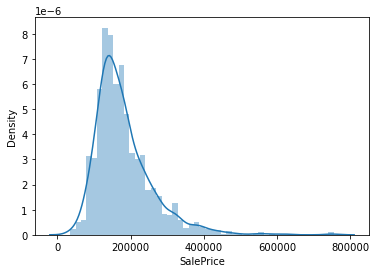

In [22]:
sns.distplot(surp['SalePrice']) #it's skewed 

In [23]:
#skewness and kurtosis
print("Skewness: %f" % surp['SalePrice'].skew())

Skewness: 1.882876


In [24]:
surp['SalePrice']=np.log(surp.SalePrice) #tranforming to form normal disribution

In [25]:
surp['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

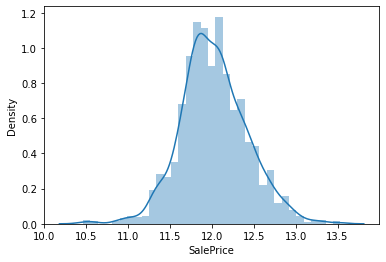

In [26]:
sns.distplot(surp.SalePrice)

In [27]:
#skewness 
print("Skewness: %f" % surp['SalePrice'].skew())

Skewness: 0.121335


# EDA

In [28]:
cat = surp.select_dtypes(include = object)
cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

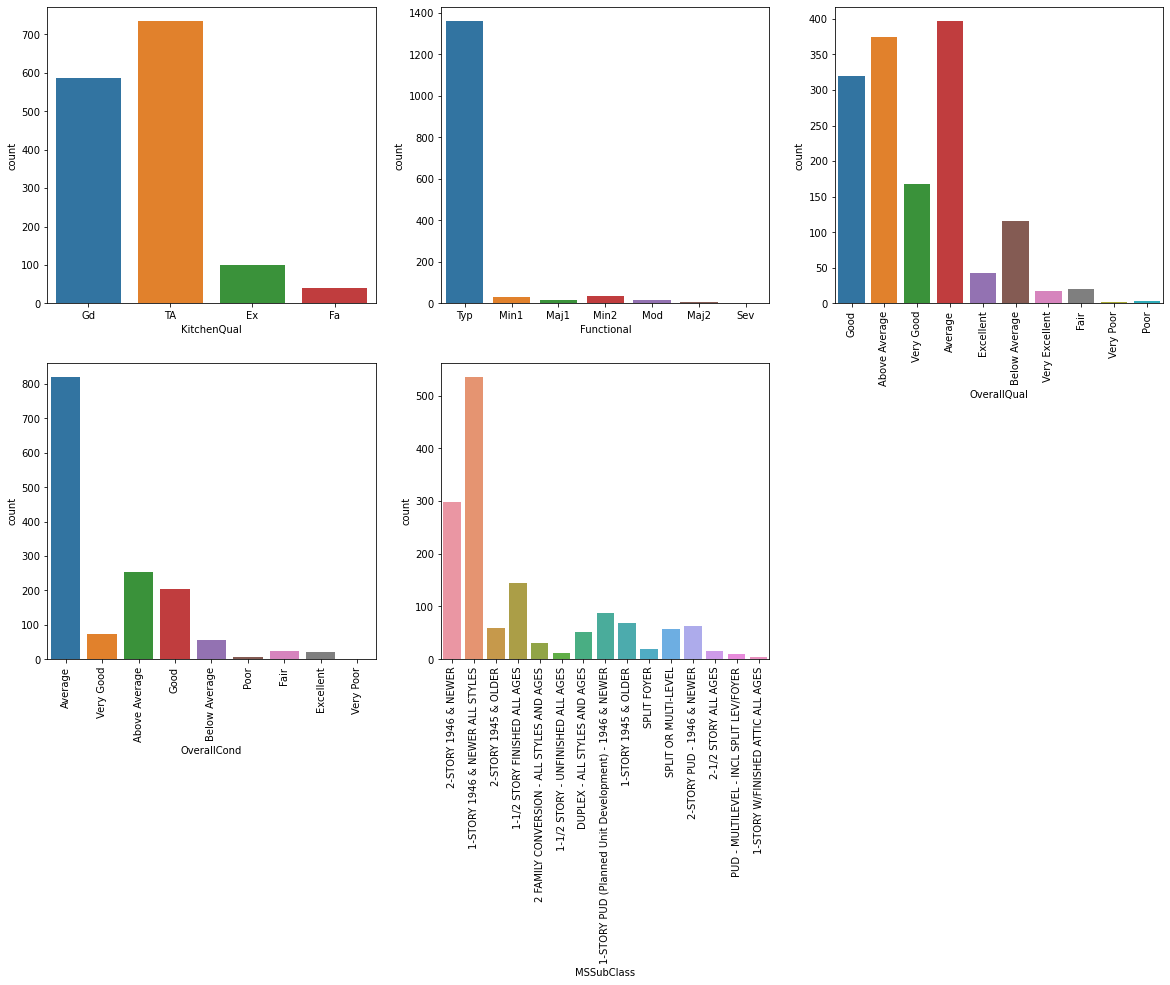

In [29]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'KitchenQual',  data = surp)
plt.subplot(2,3,2)
sns.countplot(x = 'Functional', data = surp)
plt.subplot(2,3,3)
sns.countplot(x = 'OverallQual', data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'OverallCond', data = surp)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x = 'MSSubClass',  data = surp)
plt.xticks(rotation=90)

plt.show()

In [30]:
surp['MSSubClass'].value_counts() # similarly checking other columns for skewness

1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: MSSubClass, dtype: int64

In [31]:
# Dropping highly skewed column 
surp.drop(['Functional'],axis=1,inplace=True)

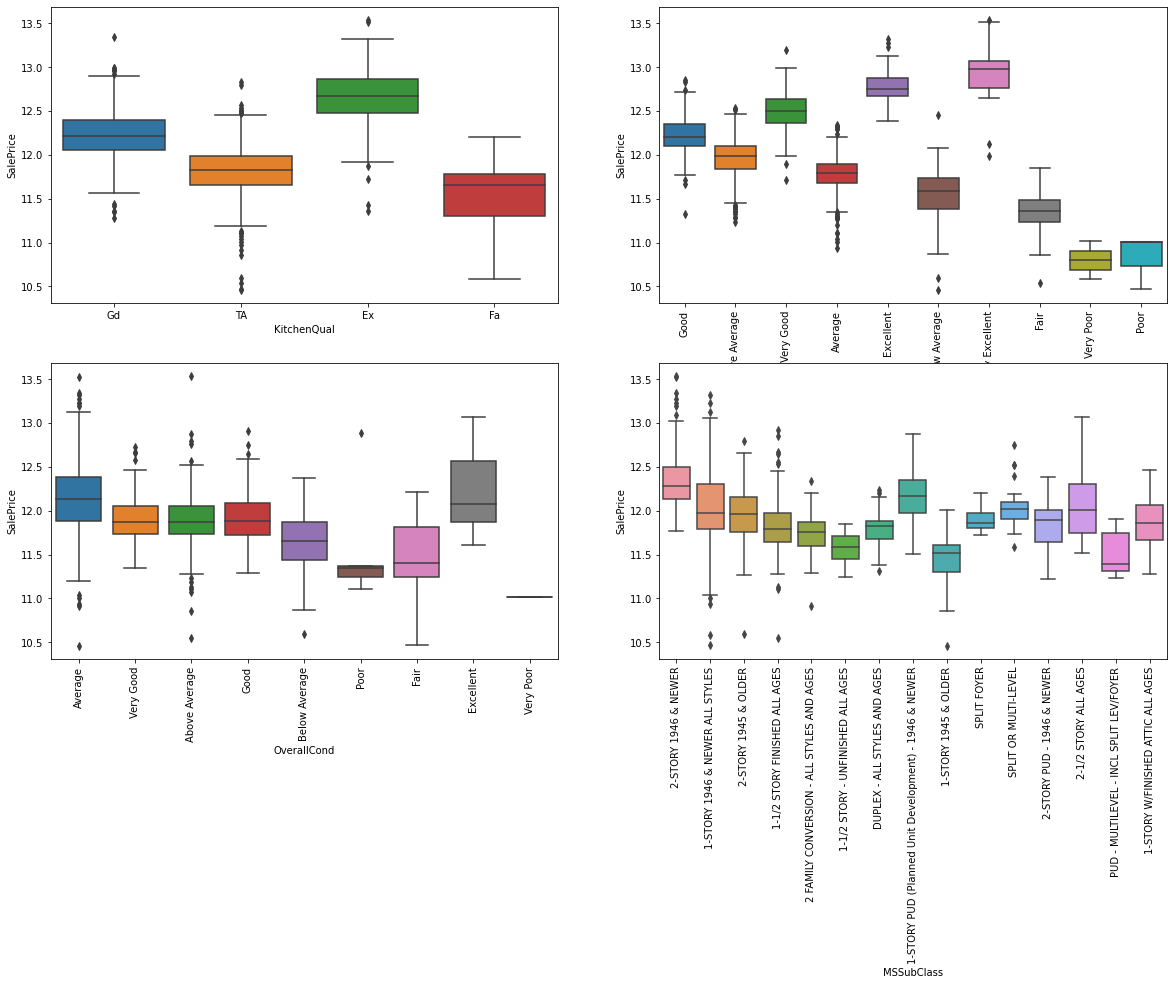

In [32]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x ='KitchenQual', y ='SalePrice', data = surp)
plt.subplot(2,2,2)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = surp)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = surp)
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = surp)
plt.xticks(rotation=90)

plt.show()

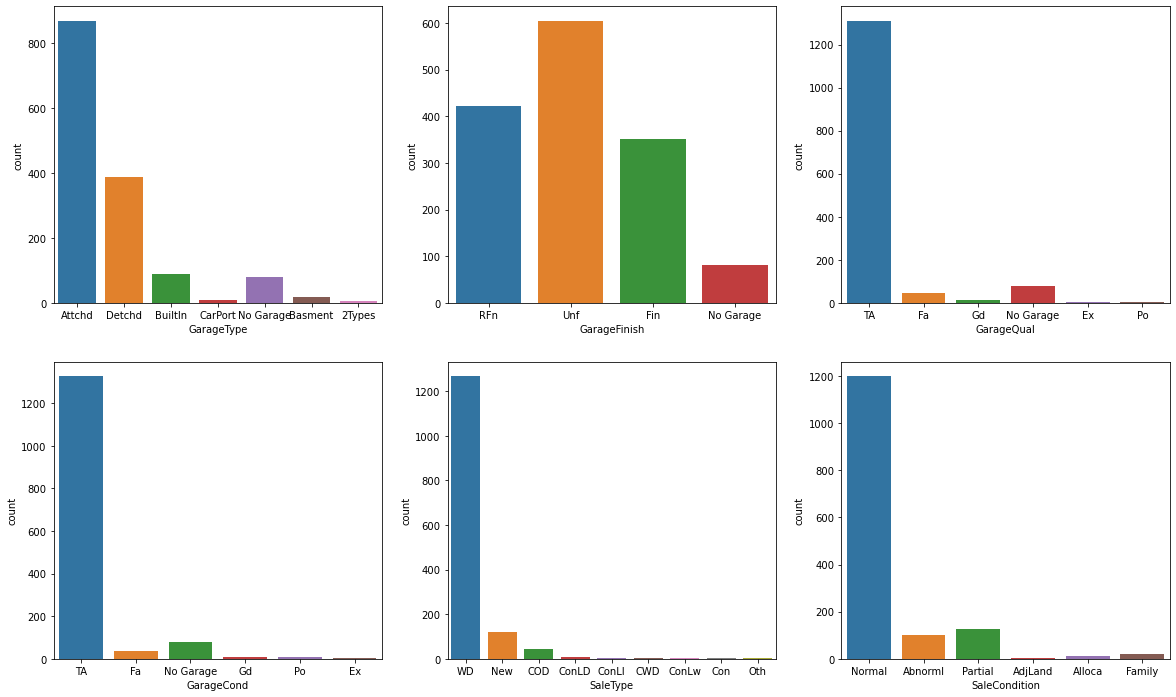

In [33]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageType',  data = surp)
plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish', data = surp)
plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = surp)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageCond', data = surp)
plt.subplot(2,3,5)
sns.countplot(x = 'SaleType',  data = surp)
plt.subplot(2,3,6)
sns.countplot(x = 'SaleCondition', data = surp)
plt.show()

In [34]:
for c in surp.columns:
    if surp[c].dtype == np.object :
        print(c)
        print(surp[c].value_counts(normalize=True))
#similarly checking other columns for skewness

MSSubClass
1-STORY 1946 & NEWER ALL STYLES                          0.367123
2-STORY 1946 & NEWER                                     0.204795
1-1/2 STORY FINISHED ALL AGES                            0.098630
1-STORY PUD (Planned Unit Development) - 1946 & NEWER    0.059589
1-STORY 1945 & OLDER                                     0.047260
2-STORY PUD - 1946 & NEWER                               0.043151
2-STORY 1945 & OLDER                                     0.041096
SPLIT OR MULTI-LEVEL                                     0.039726
DUPLEX - ALL STYLES AND AGES                             0.035616
2 FAMILY CONVERSION - ALL STYLES AND AGES                0.020548
SPLIT FOYER                                              0.013699
2-1/2 STORY ALL AGES                                     0.010959
1-1/2 STORY - UNFINISHED ALL AGES                        0.008219
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                  0.006849
1-STORY W/FINISHED ATTIC ALL AGES                        0.002740

### We can see that in this group except GarageType and Garage Finsih almost all are skewed so we can drop these columns.

In [35]:
surp['GarageType'] = surp['GarageType'].replace(['Basment','CarPort','2Types'],'Others')
surp['SaleCondition'] = surp['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')

# Dropping highly skewed column 
surp.drop(['GarageQual','GarageCond','SaleType'],axis=1,inplace=True)

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

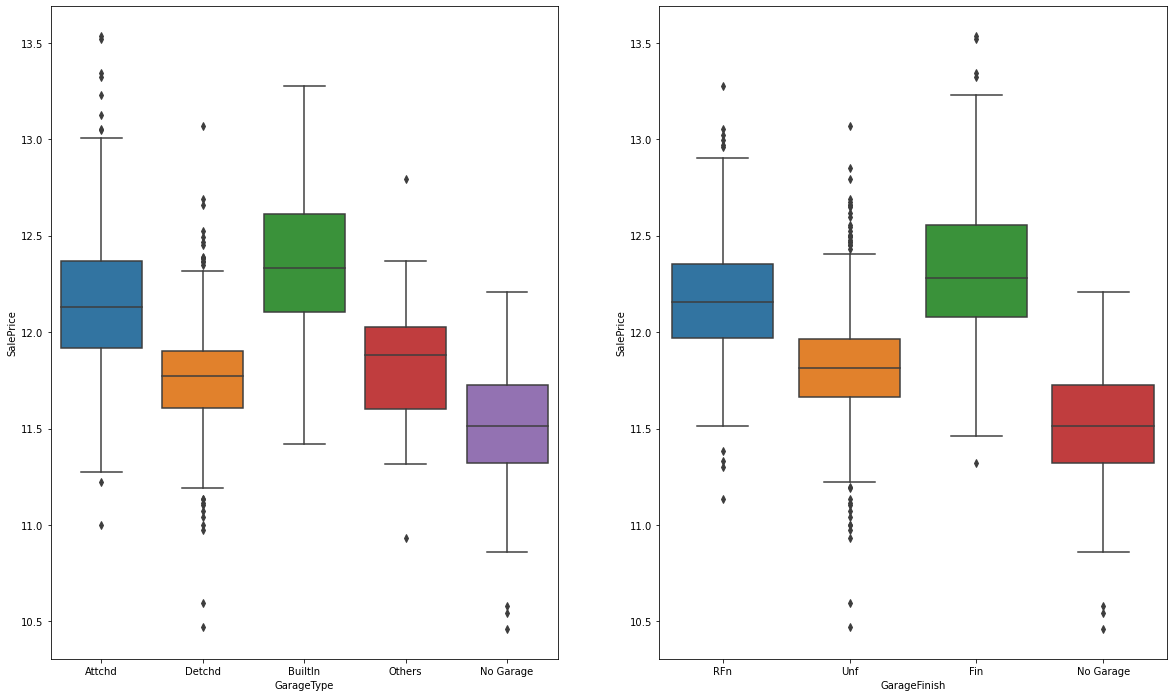

In [36]:
# Let's see effect of Garage type and GarageFinish on SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'GarageType', y ='SalePrice', data = surp)
plt.subplot(1,2,2)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = surp)

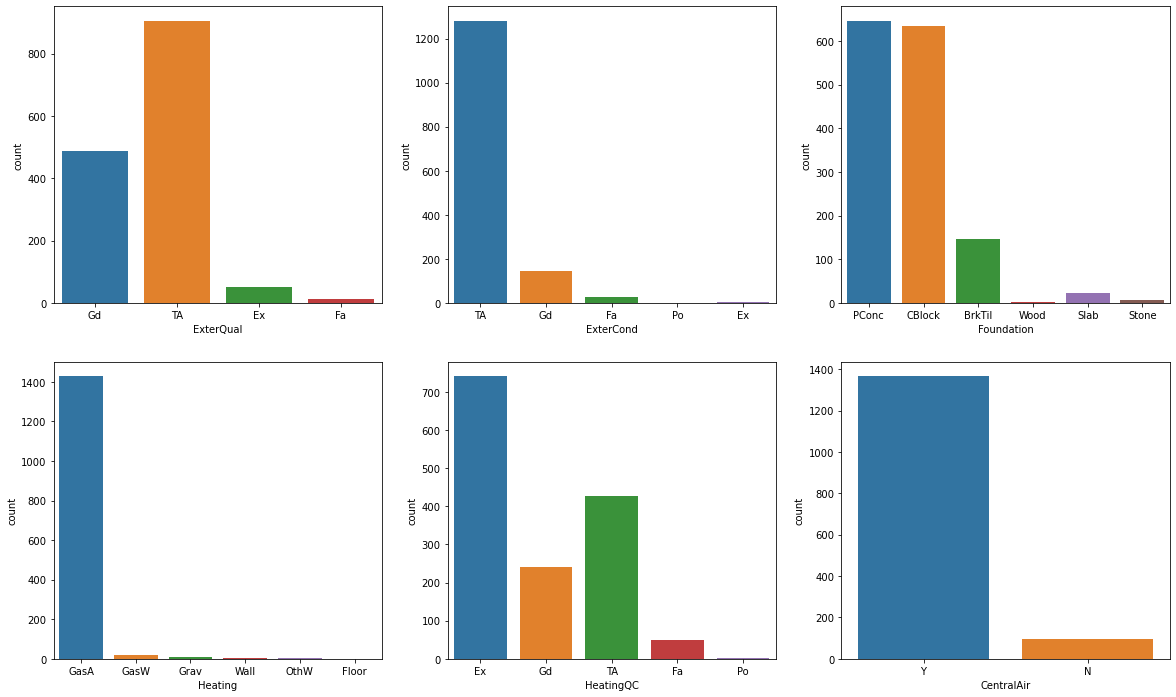

In [37]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'ExterQual',  data = surp)
plt.subplot(2,3,2)
sns.countplot(x = 'ExterCond', data = surp)
plt.subplot(2,3,3)
sns.countplot(x = 'Foundation', data = surp)
plt.subplot(2,3,4)
sns.countplot(x = 'Heating', data = surp)
plt.subplot(2,3,5)
sns.countplot(x = 'HeatingQC',  data = surp)
plt.subplot(2,3,6)
sns.countplot(x = 'CentralAir', data = surp)
plt.show()

In [38]:
surp['HeatingQC'].value_counts() # similarly checked for all variables to check the skewness

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [39]:
surp['Foundation'] = surp['Foundation'].replace(['Slab','Stone','Wood'],'Others')


# Dropping highly skewed column 
surp.drop(['CentralAir','Heating','ExterCond'],axis=1,inplace=True)

In [40]:
surp.shape

(1460, 69)

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

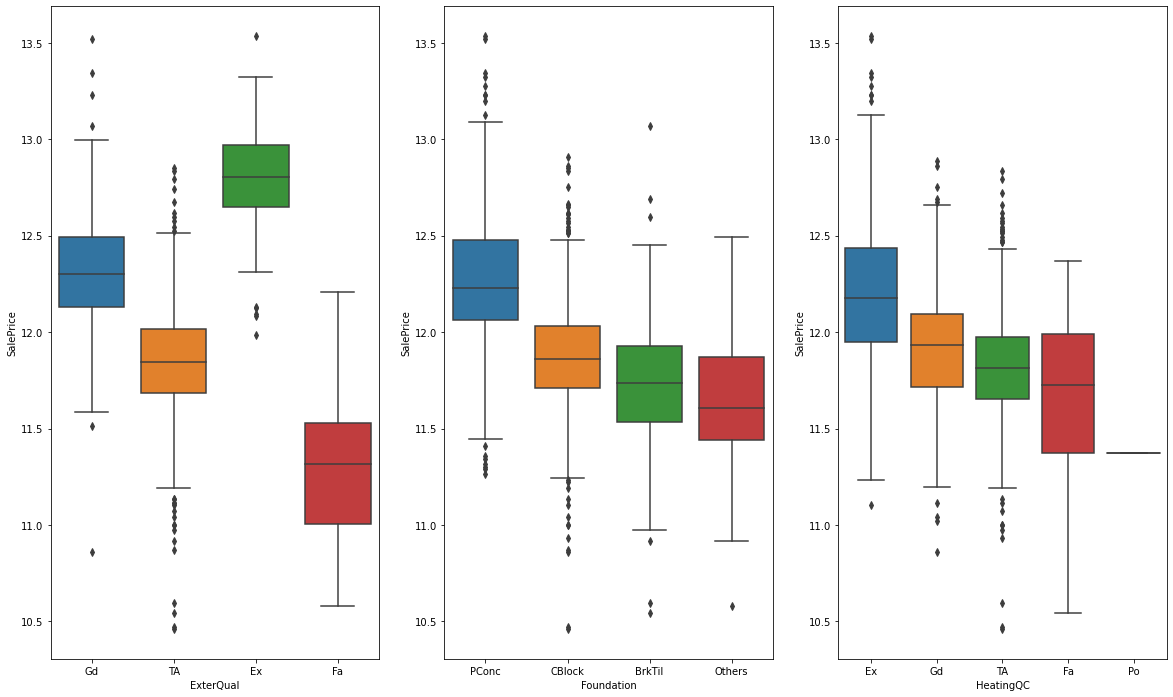

In [41]:
#Let's see effect of Garage type and GarageFinish on SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x = 'ExterQual', y ='SalePrice', data = surp)
plt.subplot(1,3,2)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = surp)
plt.subplot(1,3,3)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = surp)

- Price of Excellent ExterQual and HeatingQc is highest
- Price of Poured Contrete Foundation is highest.

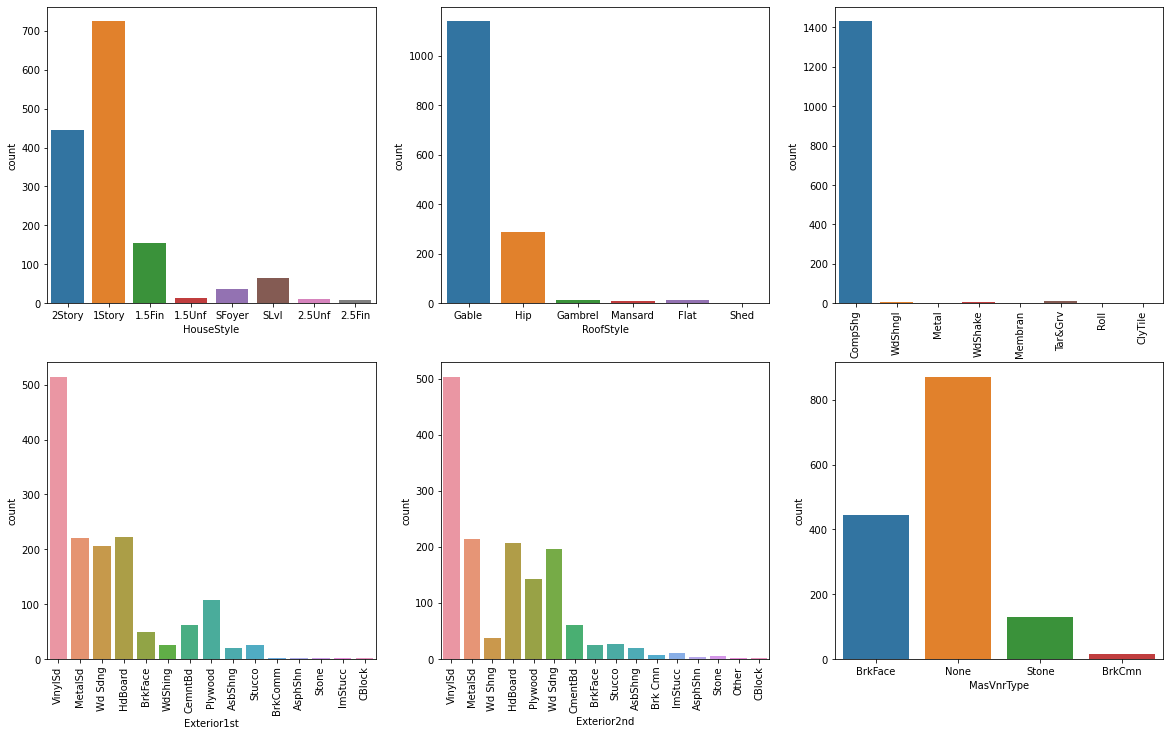

In [42]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'HouseStyle',  data = surp)
plt.subplot(2,3,2)
sns.countplot(x = 'RoofStyle', data = surp)
plt.subplot(2,3,3)
sns.countplot(x = 'RoofMatl', data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Exterior1st', data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.countplot(x = 'Exterior2nd',  data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType', data = surp)
plt.show()

In [43]:
surp['Exterior2nd'].value_counts() #similarly checking the skewness for other columns

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [44]:
surp['HouseStyle'] = surp['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
surp['RoofStyle'] = surp['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
surp['Exterior1st'] = surp['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
surp['Exterior2nd'] = surp['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace'],'Others')




# Dropping highly skewed column 
surp.drop(['RoofMatl'],axis=1,inplace=True)

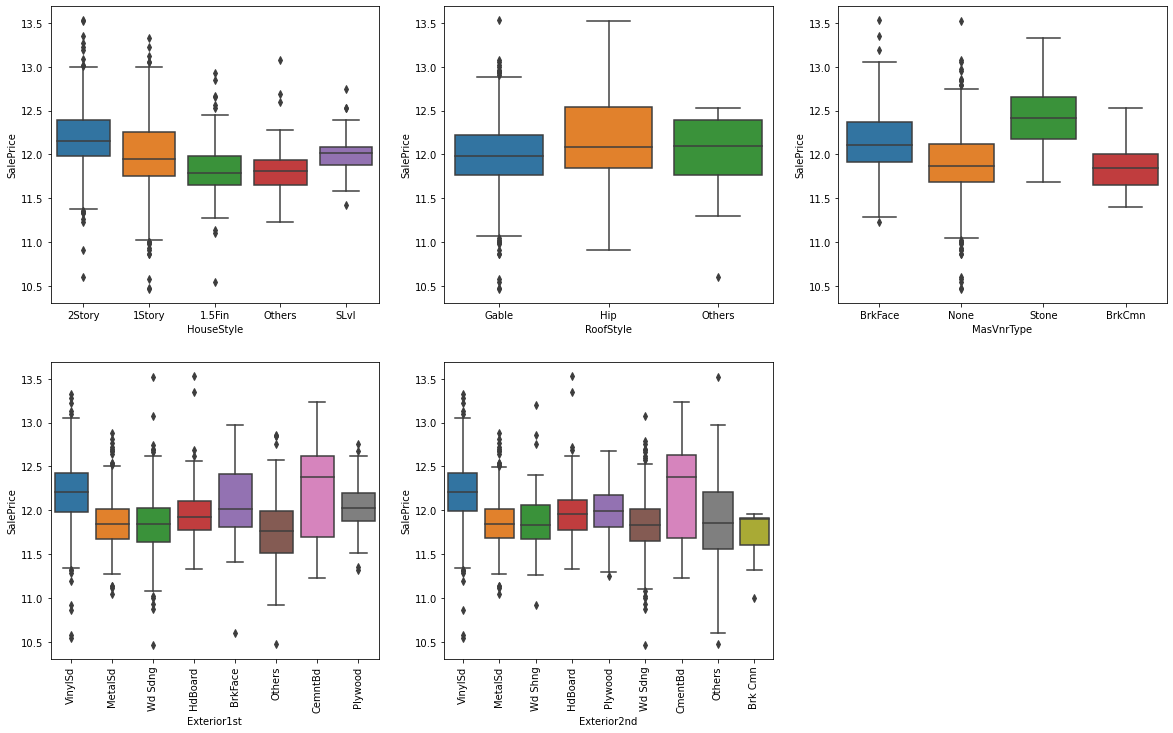

In [45]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'HouseStyle', y ='SalePrice', data = surp)
plt.subplot(2,3,2)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = surp)
plt.subplot(2,3,3)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = surp)
plt.subplot(2,3,4)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = surp)
plt.xticks(rotation=90)
plt.show()

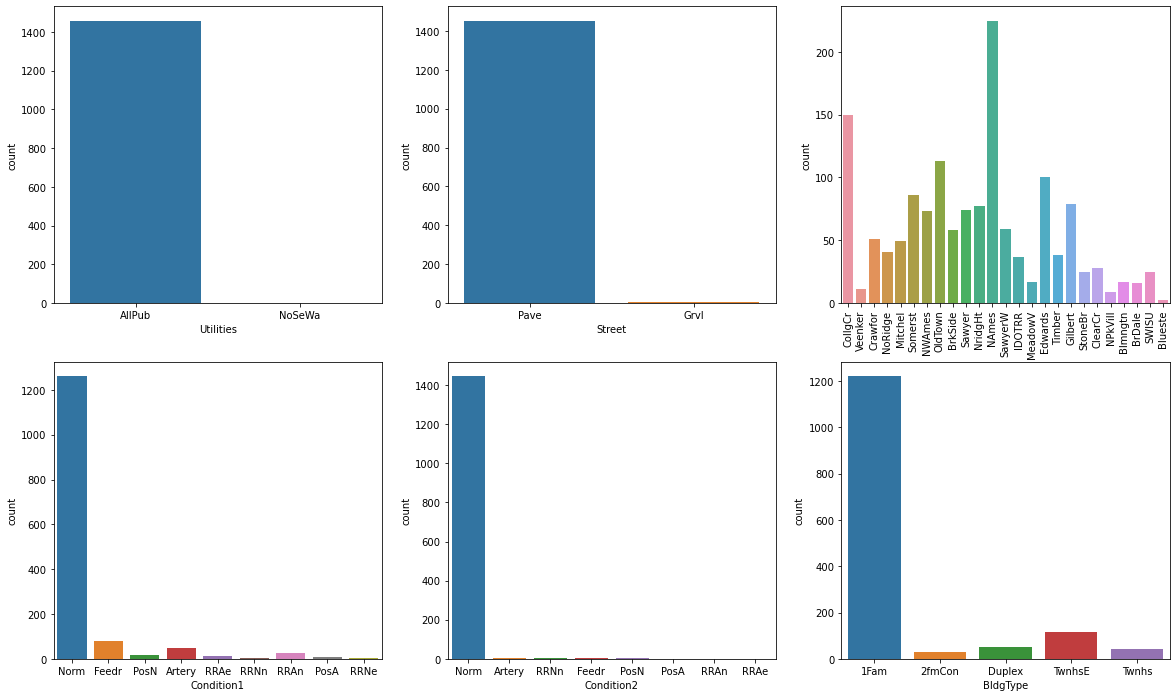

In [46]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'Utilities',  data = surp)
plt.subplot(2,3,2)
sns.countplot(x = 'Street', data = surp)
plt.subplot(2,3,3)
sns.countplot(x = 'Neighborhood', data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Condition1', data = surp)
plt.subplot(2,3,5)
sns.countplot(x = 'Condition2',  data = surp)
plt.subplot(2,3,6)
sns.countplot(x = 'BldgType', data = surp)
plt.show()

In [47]:
surp['BldgType'].value_counts()#similarly checking skewness for other columns

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [48]:
# Dropping highly skewed column 
surp.drop(['Utilities','Street','Condition1','Condition2'],axis=1,inplace=True)

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

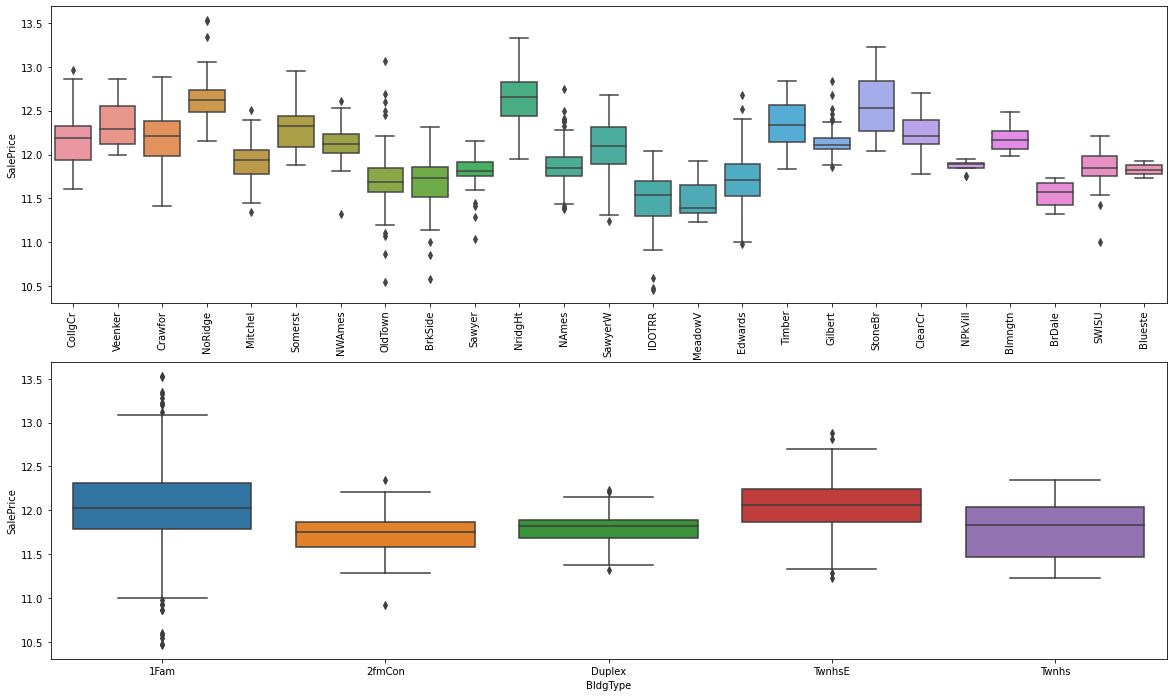

In [49]:
plt.figure(figsize=(20, 12))
plt.subplot(2,1,1)
sns.boxplot(x = 'Neighborhood', y ='SalePrice', data = surp)
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = surp)


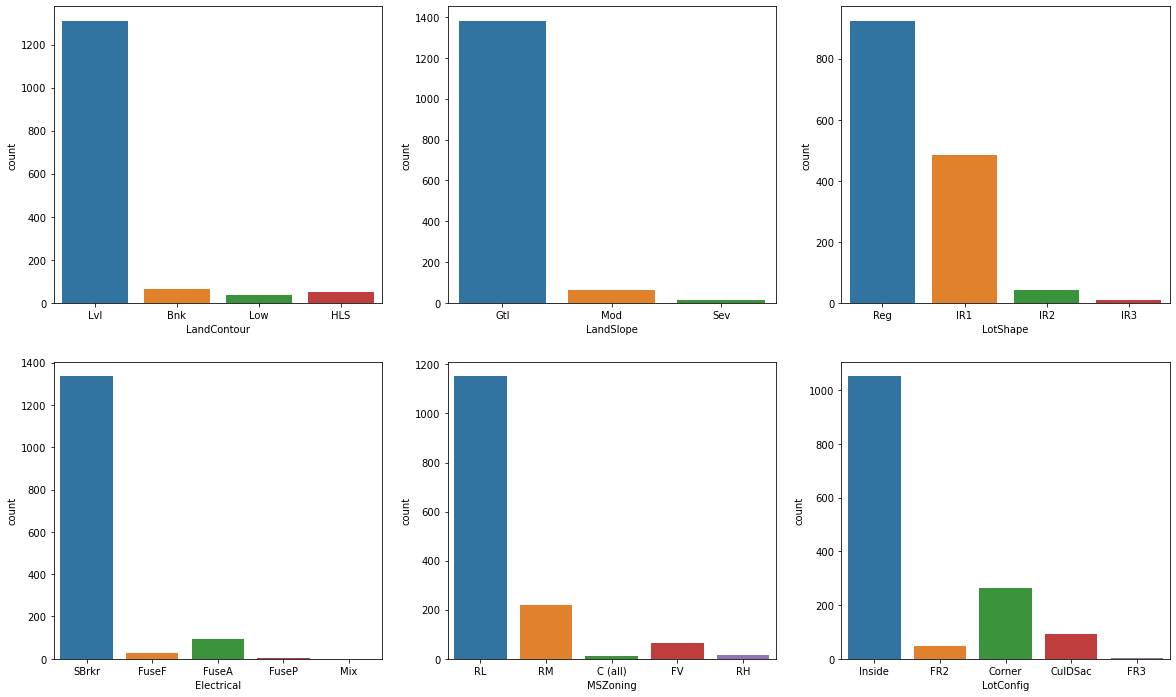

In [50]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'LandContour',  data = surp)
plt.subplot(2,3,2)
sns.countplot(x = 'LandSlope', data = surp)
plt.subplot(2,3,3)
sns.countplot(x = 'LotShape', data = surp)
plt.subplot(2,3,4)
sns.countplot(x = 'Electrical', data = surp)
plt.subplot(2,3,5)
sns.countplot(x = 'MSZoning',  data = surp)
plt.subplot(2,3,6)
sns.countplot(x = 'LotConfig', data = surp)
plt.show()

In [51]:
surp['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [52]:
surp.drop(['LandSlope','LandContour','Electrical'],axis=1,inplace=True)

surp['MSZoning'] = surp['MSZoning'].replace(['RH','C (all)'],'Others')


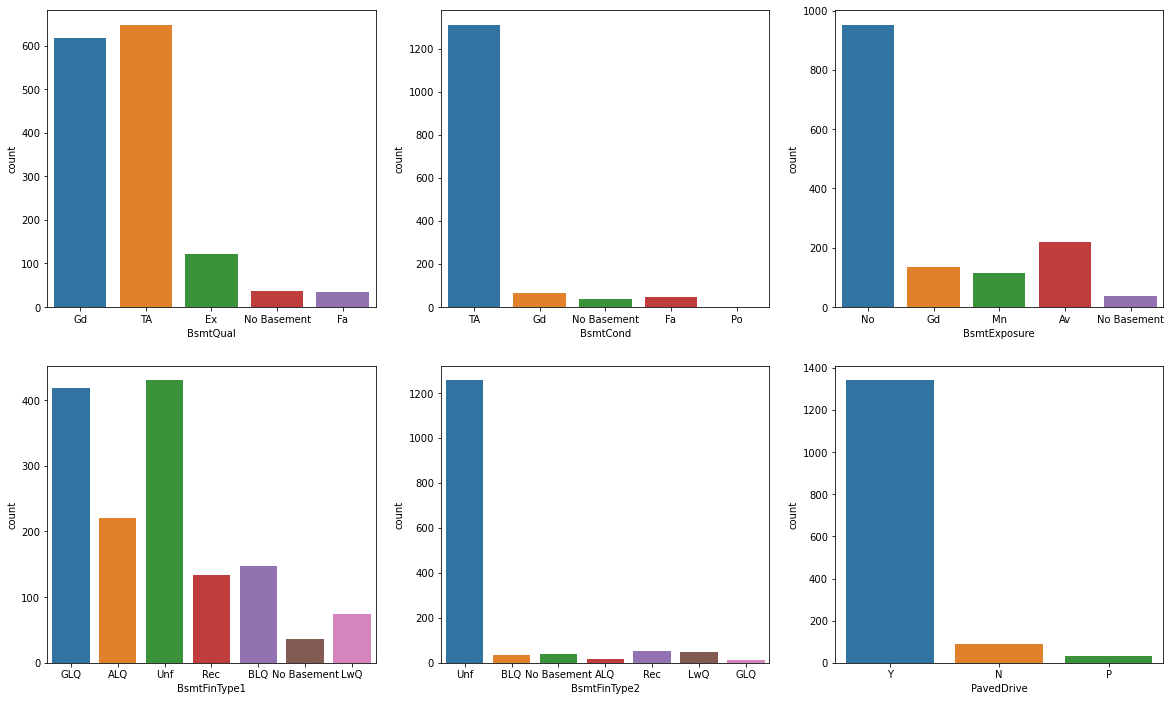

In [53]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtQual',  data = surp)
plt.subplot(2,3,2)
sns.countplot(x = 'BsmtCond', data = surp)
plt.subplot(2,3,3)
sns.countplot(x = 'BsmtExposure', data = surp)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtFinType1', data = surp)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtFinType2',  data = surp)
plt.subplot(2,3,6)
sns.countplot(x = 'PavedDrive', data = surp)
plt.show()

In [54]:
surp['BsmtCond'].value_counts() # similarly checking skewness for other columns

TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

In [55]:
surp.drop(['BsmtFinType2','PavedDrive','BsmtCond'],axis=1,inplace=True)

In [56]:
surp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,61,0,0,0,0,0,2,2008,Normal,12.247694
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,0,0,5,2007,Normal,12.109011
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,42,0,0,0,0,0,9,2008,Normal,12.317167
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,35,272,0,0,0,0,2,2006,Abnorml,11.849398
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,84,0,0,0,0,0,12,2008,Normal,12.429216


In [57]:
surp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   object 
 11  OverallCond    1460 non-null   object 
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  MasVnrAr

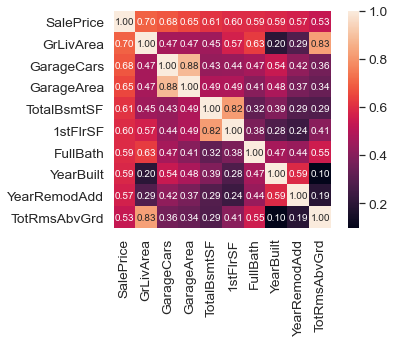

In [58]:
#saleprice correlation matrix
corrmat = surp.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(surp[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [59]:
surp['YearSinceRemodel'] = 2010 - ((surp['YearRemodAdd'] - surp['YearBuilt']) + surp['YearBuilt']) #feature engineering

In [60]:
Cat1 = surp.select_dtypes(include=['object']) #checking all categorical columns to form dummy variables
Cat1.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleCondition'],
      dtype='object')

In [61]:
Num = surp.select_dtypes(include=['int64','float64']) #all numerical variables
Num.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'YearSinceRemodel'],
      dtype='object')

In [62]:
Num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1460 non-null   int64  
 1   LotFrontage       1460 non-null   float64
 2   LotArea           1460 non-null   int64  
 3   YearBuilt         1460 non-null   int64  
 4   YearRemodAdd      1460 non-null   int64  
 5   MasVnrArea        1460 non-null   float64
 6   BsmtFinSF1        1460 non-null   int64  
 7   BsmtFinSF2        1460 non-null   int64  
 8   BsmtUnfSF         1460 non-null   int64  
 9   TotalBsmtSF       1460 non-null   int64  
 10  1stFlrSF          1460 non-null   int64  
 11  2ndFlrSF          1460 non-null   int64  
 12  LowQualFinSF      1460 non-null   int64  
 13  GrLivArea         1460 non-null   int64  
 14  BsmtFullBath      1460 non-null   int64  
 15  BsmtHalfBath      1460 non-null   int64  
 16  FullBath          1460 non-null   int64  


In [63]:
Cat1 = pd.get_dummies(Cat1,drop_first=True)  # Dummy variables
print(Cat1.shape)

(1460, 130)


In [64]:
Cat1.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0


In [65]:
# concat dummy variables with main dataset
surp = pd.concat([surp, Cat1], axis=1) 

In [66]:
surp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,0,1,0,1,0,0
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,0,1,0,1,0,0
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,0,1,0,1,0,0
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,1,0,0,0,0,1,0,0,0
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,0,1,0,1,0,0


In [67]:
surp.drop(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish',
       'SaleCondition','Id','OverallCond','MSSubClass','OverallQual'],axis=1,inplace=True) #removing columns as dummy variables already formed

In [68]:
surp.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,0,0,1,0,1,0,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,0,0,1,0,1,0,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,1,0,0,0,0,1,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,0,0,1,0,1,0,0


In [69]:
surp.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True) #no need of these while making a model 

In [70]:
surp.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,0,1,0,1,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,0,1,0,1,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,1,0,0,0,0,1,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,0,1,0,1,0,0


In [71]:
# Putting feature variable to X
X = surp.drop(['SalePrice'], axis=1)

X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,0,1,0,1,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,0,1,0,1,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,1,0,0,0,0,1,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,0,1,0,1,0,0


In [72]:
# Putting response variable to y
y = surp['SalePrice']

y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (1021, 160)
X_test Shape: (438, 160)
y_train Shape: (1021,)
y_test Shape: (438,)


In [74]:
scaler = StandardScaler()

X_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']] = scaler.fit_transform(X_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']])

X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
210,-0.115302,-0.473765,-0.558025,0.043512,-0.293313,-0.374367,-0.430911,-0.765065,-0.787597,-0.124502,...,0,0,1,0,1,0,0,1,0,0
318,0.926898,-0.056845,0.809137,1.160345,-0.293313,-0.454644,0.621579,0.511914,2.140556,-0.124502,...,0,0,0,0,0,1,0,1,0,0
239,-0.794998,-0.169324,-0.558025,-0.761296,-0.293313,0.171964,-0.712011,-0.930972,0.795996,-0.124502,...,0,1,0,0,0,0,1,1,0,0
986,-0.477806,-0.502297,-0.558025,-0.963574,-0.293313,-0.175904,-1.256778,-0.420683,0.669584,-0.124502,...,0,0,0,0,0,0,1,1,0,0
1416,-0.432493,0.082905,-0.558025,-0.963574,-0.293313,0.475233,-0.620490,0.195183,1.611926,-0.124502,...,0,1,0,0,0,0,1,1,0,0


In [75]:
X_test[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']] = scaler.transform(X_test[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']])

X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
1436,-0.432493,-0.144189,-0.558025,0.361992,-0.293313,-0.704396,-0.430911,-0.765065,-0.787597,-0.124502,...,0,1,0,0,0,0,1,1,0,0
57,0.881585,0.112505,-0.558025,-0.963574,-0.293313,0.660317,-0.439628,-0.775120,1.189021,-0.124502,...,0,0,0,0,0,1,0,1,0,0
780,-0.296554,-0.253368,-0.355087,-0.963574,-0.293313,1.500998,0.381881,0.212779,-0.787597,-0.124502,...,0,0,0,0,0,0,0,1,0,0
382,0.428455,-0.120412,-0.558025,-0.963574,-0.293313,0.836481,-0.267481,-0.576535,1.184425,-0.124502,...,0,0,0,0,0,1,0,1,0,0
1170,0.292515,-0.058786,-0.558025,0.159714,-0.293313,0.022559,0.074633,-0.126576,-0.787597,-0.124502,...,0,0,0,0,0,0,0,1,0,0


# Model Building and Evaluation
- Ridge and Lasso Regression

## Ridge

In [76]:
# list of alphas to tune
#params = {'alpha': [0.00004,0.0001, 0.001, 0.01, 0.1, 10,100,1000]}
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)   

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [77]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005194,0.001480,0.001993,6.296966e-04,0.0001,{'alpha': 0.0001},0.868247,0.777081,0.838201,0.890476,...,0.853288,0.042836,21,0.924369,0.935767,0.931027,0.919954,0.918905,0.926004,0.006484
1,0.004186,0.000399,0.001793,3.985883e-04,0.001,{'alpha': 0.001},0.868258,0.777072,0.838199,0.890516,...,0.853309,0.042858,20,0.924369,0.935767,0.931027,0.919954,0.918905,0.926004,0.006484
2,0.004817,0.000416,0.002025,5.281272e-05,0.01,{'alpha': 0.01},0.868370,0.776981,0.838187,0.890872,...,0.853503,0.043072,19,0.924368,0.935766,0.931026,0.919953,0.918902,0.926003,0.006484
3,0.004568,0.000507,0.001882,2.260137e-04,0.05,{'alpha': 0.05},0.868847,0.776571,0.838121,0.891946,...,0.854176,0.043866,17,0.924357,0.935750,0.931009,0.919938,0.918855,0.925982,0.006491
4,0.004598,0.000804,0.001993,2.431402e-07,0.1,{'alpha': 0.1},0.869407,0.776059,0.838023,0.892844,...,0.854780,0.044657,16,0.924329,0.935711,0.930967,0.919904,0.918744,0.925931,0.006505


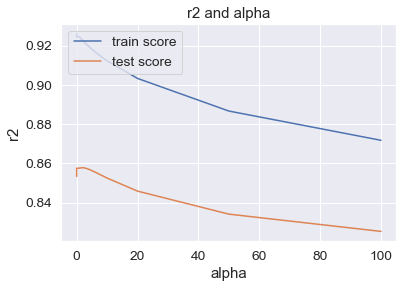

In [78]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [79]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [80]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.01165544  0.01573498 -0.00215659 -0.002585    0.00094085  0.00999626
  0.00750074  0.02839581  0.0443335  -0.00282704  0.05726102  0.02415759
  0.00467504  0.03177594  0.02072623  0.0062981  -0.02846814  0.01588296
  0.02129509  0.03844587  0.00295937  0.01170853 -0.00375441  0.0093902
  0.00635142  0.01112944 -0.011002   -0.00141004  0.00055017 -0.00122151
  0.02000458 -0.09746463  0.04383641 -0.00147225 -0.01429154  0.00323443
  0.04354924  0.0182269  -0.00502106 -0.04872774  0.03615889 -0.0401446
  0.03811704  0.00766691 -0.09716498 -0.00887992 -0.02648587  0.02763455
 -0.05474433  0.0107146   0.0358475  -0.04885967 -0.04672677 -0.00508296
 -0.0138553  -0.03364933  0.01380719  0.07382353  0.02091872  0.11779327
 -0.09214862  0.0208893  -0.11729891 -0.12612855 -0.0116679  -0.02025402
 -0.02478764 -0.01149947  0.12716866  0.13756311 -0.08746333 -0.00039125
 -0.05002438  0.02670677  0.11775933  0.10818222  0.00294361  0.0652738
  0.00323443  0.03615889 -0.06977247 -0.02464862  0.03

In [81]:
ridge.score(X_train,y_train)

0.9179038801292574

In [82]:
ridge.score(X_test,y_test)

0.8796077629191585

In [83]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.146),
 ('LotFrontage', -0.243),
 ('LotArea', -0.215),
 ('MasVnrArea', -0.126),
 ('BsmtFinSF1', -0.117),
 ('BsmtFinSF2', -0.097),
 ('BsmtUnfSF', -0.097),
 ('TotalBsmtSF', -0.092),
 ('1stFlrSF', -0.087),
 ('2ndFlrSF', -0.085),
 ('LowQualFinSF', -0.084),
 ('GrLivArea', -0.083),
 ('BsmtFullBath', -0.083),
 ('BsmtHalfBath', -0.08),
 ('FullBath', -0.08),
 ('HalfBath', -0.079),
 ('BedroomAbvGr', -0.078),
 ('KitchenAbvGr', -0.076),
 ('TotRmsAbvGrd', -0.074),
 ('Fireplaces', -0.074),
 ('GarageCars', -0.073),
 ('GarageArea', -0.072),
 ('WoodDeckSF', -0.07),
 ('OpenPorchSF', -0.069),
 ('EnclosedPorch', -0.068),
 ('3SsnPorch', -0.067),
 ('ScreenPorch', -0.066),
 ('PoolArea', -0.064),
 ('MiscVal', -0.063),
 ('MoSold', -0.061),
 ('YearSinceRemodel', -0.056),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.055),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.055),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.052),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', 

In [84]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9179038801292574
0.8796077629191585
13.175790362135317
8.676496490637065
0.012904789776822053
0.019809352718349466


# Lasso

In [85]:
# params = {'alpha': [0.00006,0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008 ]}
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [86]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [87]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=10]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.044527,0.005695,0.001993,2.148415e-06,0.0001,{'alpha': 0.0001},0.874768,0.770319,0.839561,0.897835,...,0.857059,0.048784,1,0.923275,0.934443,0.929673,0.918814,0.917105,0.924662,0.006542
1,0.012077,0.001753,0.001994,3.234067e-07,0.001,{'alpha': 0.001},0.885273,0.722067,0.829343,0.891371,...,0.846450,0.067266,2,0.901189,0.917142,0.909678,0.898283,0.892354,0.903729,0.008727
2,0.006203,0.000446,0.002192,3.986838e-04,0.01,{'alpha': 0.01},0.856344,0.606870,0.758382,0.835801,...,0.779486,0.092721,3,0.809274,0.843497,0.831489,0.812904,0.808620,0.821157,0.013945
3,0.005580,0.000490,0.002392,4.883051e-04,0.05,{'alpha': 0.05},0.790733,0.626293,0.714710,0.742633,...,0.722219,0.053999,4,0.719711,0.774160,0.743261,0.732420,0.720483,0.738007,0.020038
4,0.004784,0.000399,0.001794,7.463404e-04,0.1,{'alpha': 0.1},0.680198,0.588893,0.631093,0.638648,...,0.629556,0.030750,5,0.623980,0.661241,0.644969,0.638443,0.619624,0.637651,0.014984


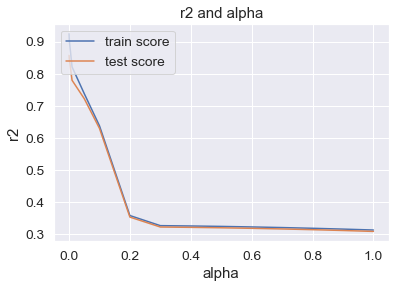

In [88]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [89]:
#optimum alpha

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [90]:
lasso.coef_

array([-1.11031366e-02,  1.54547863e-02, -3.06724605e-03, -0.00000000e+00,
        1.63126698e-03,  1.39765699e-02,  0.00000000e+00,  2.94508013e-02,
        4.38673444e-02, -3.24854793e-03,  5.61310278e-02,  2.46122187e-02,
        4.62522534e-03,  3.04817096e-02,  2.01592310e-02,  5.24736725e-03,
       -2.80221063e-02,  1.63686431e-02,  2.04087774e-02,  3.74820011e-02,
        2.18992915e-03,  1.16095205e-02, -3.61672634e-03,  8.98964458e-03,
        6.35073695e-03,  1.08042565e-02, -1.06280080e-02, -1.33832404e-03,
        3.68625684e-04, -1.21500823e-03,  3.33073517e-04, -1.06198286e-01,
        3.43462232e-02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        3.03583383e-02,  1.38871221e-04, -1.44893134e-02, -4.76449561e-02,
        3.48077351e-02, -7.80945785e-03,  2.78817881e-02,  0.00000000e+00,
       -8.43497247e-02, -0.00000000e+00, -1.18080266e-02,  2.54407419e-02,
       -4.72386646e-02,  1.07646468e-02,  3.49591350e-02, -4.68354777e-02,
       -4.14663972e-02, -

In [91]:
lasso.score(X_train,y_train)

0.919262290768909

In [92]:
lasso.score(X_test,y_test)

0.8784918234336492

In [93]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

[('constant', 12.174),
 ('LotFrontage', -0.459),
 ('LotArea', -0.233),
 ('MasVnrArea', -0.215),
 ('BsmtFinSF1', -0.205),
 ('BsmtFinSF2', -0.163),
 ('BsmtUnfSF', -0.121),
 ('TotalBsmtSF', -0.115),
 ('1stFlrSF', -0.106),
 ('2ndFlrSF', -0.092),
 ('LowQualFinSF', -0.09),
 ('GrLivArea', -0.087),
 ('BsmtFullBath', -0.086),
 ('BsmtHalfBath', -0.084),
 ('FullBath', -0.084),
 ('HalfBath', -0.083),
 ('BedroomAbvGr', -0.08),
 ('KitchenAbvGr', -0.078),
 ('TotRmsAbvGrd', -0.077),
 ('Fireplaces', -0.075),
 ('GarageCars', -0.071),
 ('GarageArea', -0.07),
 ('WoodDeckSF', -0.069),
 ('OpenPorchSF', -0.069),
 ('EnclosedPorch', -0.067),
 ('3SsnPorch', -0.067),
 ('ScreenPorch', -0.064),
 ('PoolArea', -0.059),
 ('MiscVal', -0.058),
 ('MoSold', -0.054),
 ('YearSinceRemodel', -0.05),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.05),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.048),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.047),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0

In [94]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.919262290768909
0.8784918234336492
12.957775992614268
8.756920654724023
0.01269125954222749
0.019992969531333386


In [95]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metric2
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression'] )
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.917904,0.919262
1,R2 Score (Test),0.879608,0.878492
2,RSS (Train),13.175790,12.957776
3,RSS (Test),8.676496,8.756921
4,MSE (Train),0.113599,0.112655
5,MSE (Test),0.140746,0.141396


# Conclusion :

- we got a decent score for both Ridge and Lasso regression.
- Ridge : Train :91.7 Test :87.9
- Lasso : Train :91.9 Test :87.8

## Top 5 most significant variables in Ridge are:
- ('SaleCondition_Partial', 0.201)
- ('SaleCondition_Others', 0.138)
- ('SaleCondition_Normal', 0.129)
- ('GarageFinish_Unf', 0.127)
- ('GarageFinish_RFn', 0.118)

## Top 5 most significant variables in Lasso are:
- ('SaleCondition_Partial', 0.228)
- ('SaleCondition_Others', 0.152)
- ('SaleCondition_Normal', 0.147)
- ('GarageFinish_Unf', 0.140)
- ('GarageFinish_RFn', 0.137)

## These Varaiables are directly proportional to each other.
- Optimal Value of lamda for ridge : 2
- Optimal Value of lamda for Lasso : 0.001
- Because of Feature selection as well we can choose Lasso regression in this case.